<div style="width:100%"><a href="https://www.routledge.com/Python-Programming-for-Mathematics/Guillod/p/book/9781032910116"><img src="https://python.guillod.org/book/banner1.png"/></a></div>

This file reflects the statements of the exercises of a chapter of the book *[Python Programming for Mathematics](https://www.routledge.com/Python-Programming-for-Mathematics/Guillod/p/book/9781032910116)*.
All statements can be downloaded in [Jupyter Notebook](https://python.guillod.org/book/) format or executed directly online on [GESIS](https://notebooks.gesis.org/binder/v2/gh/guillod/python-book/HEAD).
The answers are available in the book (ISBN [9781032910116](https://www.routledge.com/Python-Programming-for-Mathematics/Guillod/p/book/9781032910116)) and ebook (ISBN [9781003565451](https://www.routledge.com/Python-Programming-for-Mathematics/Guillod/p/book/9781003565451)) published by Chapman & Hall/CRC Press in the Python Series.
This file reflects the exercises as published in this book and differs somewhat from the exercises presented on the page [python.guillod.org](https://python.guillod.org/).

# 12 Data science

<div id="ch:data-science"></div>

The methodology of data science is to use available data (usally a large amount) to answers questions.
Dealing with large number of data is not very practical with Python's default data structures or NumPy.
First, the Pandas module specially designed for data analysis will be presented.
The Pandas documentation is available [here](https://pandas.pydata.org/docs/).

To load the Pandas module, it is usual to proceed as follows:

In [1]:
import pandas as pd

Next, real data will be analyzed by making statistics on the proportion of numbers beginning with a certain digit, as well as determining trends.
Finally, three aspects of machine learning will be examined, with handwritten digit recognition, automatic differentiation, and the use of a neural network.

**Concepts abordés:**

* data import and analysis

* use of Pandas

* Benford's law

* least-squares methods

* image classification

* automatic differentiation

* neural networks

# Exercise 12.1: Introduction to Pandas

**Creation.**
In Pandas, a data table is a `DataFrame` and constructing a table can be done manually from a dictionary, for example:

In [2]:
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)

In Jupyter Lab, it suffices to execute the cell:

In [3]:
df

to display the table. One can see here, it consists of three columns (with given labels) and three rows that are labeled by integers by default.

**Columns extraction.**
One single column of a `DataFrame` is called a `Series` and can be extracted easily:

In [4]:
df["Age"]

On such a column, statistics can be done in a simple way, for exemple, to determine the oldest people and the mean age:

In [5]:
df["Age"].max(), df["Age"].mean()

Two columns can also be extracted:

In [6]:
df[["Age", "Sex"]]

**New column creation.**
One can also add additional data, for example, a new column with 100 over the ages:

In [7]:
df["Age inv"] = 100/df["Age"]
df

We note that such operation are elementwise so there is no need for a loop, in the same spirt as NumPy, even for more complex logic:

In [8]:
def myfunction(l):
    if l["Sex"] == "male":
        return l["Age"]+5
    else:
        return l["Age"]+2
df["Age new"] = df.apply(myfunction, axis=1)

**Rows extraction.**
Selecting rows satisfying some criterion is very important and quite simple, for example, people being more than 30 years old:

In [9]:
df[df["Age"]>30]

or female being more than 30 years old:

In [10]:
df[(df["Age"]>30) & (df["Sex"]=="female")]

This concept is very similar to NumPy indexing. For a more complex selection, we could use the following syntax:

In [11]:
value=3
df.query('`Age inv`>@value and Sex=="male"')

**Slicing.**
Similar to NumPy, it is possible to use slicing to select part ot the table:

In [12]:
df.loc[0:1, "Sex":"Age new"]

Note that the end points are included, unlike the standard Python method. However, here is slicing without endpoints:

In [13]:
df.iloc[0:2,3:5]

**Plotting.**
Finally, data can be represented graphically in various ways. The simplest way is to do:

In [14]:
df.plot(x="Name", y=["Age","Age inv"])

**a)**
Download the World Bank's education data in CSV format at the following address: <https://data.worldbank.org/topic/education>.

**b)**
By inspecting the previous files, extract the data required to create a two-column table, the first containing country codes, the second country names.

**Hint.**
Use the `read_csv` function to read a CSV file with Pandas.

**c)**
Looking at the documentation of the `rename` and `set_index` functions, rename the column labels to `code` and `country`, then set the country code as the row index.
The aim is that the name of the country can then be determined from its code with the function `loc["FRA"]`.

**d)**
Determine the code for Zimbabwe from the table above.

**e)**
Determine the code associated with the proportion of unemployed and the proportion of people with at least a master's degree from the data downloaded above.

**Hint.**
Search for the "Unemployment" and "Master" strings in the file `Metadata_Indicator...`.

**f)**
Plot the evolution of the unemployment rate in France.

**Hint.**
The file `API...` contains a header and really only starts at line 5; use the `skiprows=4` option to ignore the header.

**g)**
Write a function `time_plot(code, countries)` to plot the time evolution of the `code` indicator for the countries in the `countries` list. Test it on the unemployment rate and the proportion of people with at least a master's degree for different countries.

# Exercise 12.2: Benford's law

Benford's law predicts that statistically in a list of given numbers, the probability that one of these numbers begins with the digit 1 is greater than the probability that it begins with the digit 9. More precisely, Benford's law predicts that the probability that a number begins with the digit $d$ is:

$$
p_d = \log_{10}\bigg(1+\frac{1}{d}\bigg) \,,
$$

where $\log_{10}$ is the logarithm in base 10.
It is possible to verify that Benford's law is the only one that remains invariant by change of units, *i.e.*, by multiplying the numbers of the list by a constant, the previous probabilities remain unchanged.

**a)**
Write a function `firstdigit(n)` which for a given number `n` returns its first digit and a function `occurrences(lst)` which returns the number of occurrences of the first digits in `lst`.

**Hint.**
Make the `occurrences` function work even if the list contains zeros by ignoring them.

**b)**
Check if Benford's law seems to be satisfied for the sequence of numbers $(2^n)_ {n\in\mathbb{N}}$ by comparing the empirical histogram with Benford's law.

**c)**
Check if Benford's law seems to be satisfied for the sequence of numbers $(3n+1)_ {n\in\mathbb{N}}$.

**d)**
By going to the INSEE website at the address: <https://www.insee.fr/fr/statistiques/7631680>, download the file in CSV format containing the French population data by sex and age grouped (POP1A). Import this data to have the population by postal code, sex, and age group.

**Hint.**
Documentation on how to read files is available [here](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files).

**e)**
Determine if the list of all populations by postal code, sex, and age follows Benford's law.

**f)**
Sum the previous data to obtain the list of populations by postal code and determine if it follows Benford's law.

**g)**
Repeat the previous two questions, but using the POP1B population file with ungrouped ages and using Pandas.

**h)**
<font color="red">!!</font> By going to the INSEE website or elsewhere download your favorite data set and test if it follows Benford's law.

**Hint.**
Use, for example, the detailed French government accounts available [here](https://www.data.gouv.fr/fr/datasets/donnees-de-comptabilite-generale-de-letat/).

# Exercise 12.3: Least squares method

**a)**
Reuse the INSEE data on the French population by sex and age [POP1B](https://www.insee.fr/fr/statistiques/7631680).
Write a function `pop(code)` that returns, as a list or NumPy vector, the population by age, without distinction between men and women, in the municipality with postal code `code`. Use this function to determine the total number of people living in postal code 75102.

**b)**
Write a function `plot_pop(code)` to plot the population fractions
(normalized by the total population of the municipality) as a function of age, without distinction between men and women, in the municipality with postal code `code`.
Test for municipalities with postal codes 13201 and 75102.

For a given municipality, if we denote by $p(a)$ the fraction of the population of age $a$,
we look for the coefficients $r_0$, $r_1$, $r_2$ such that the law:

$$
p(a) = r_0+r_1a+r_2a^2 \,,
$$

is best satisfied for ages $a\geq25$.
To do this, we solve the least squares problem:

$$
\min_{\boldsymbol{r}\in \mathbb{R}^3}\|X\boldsymbol{r}-\boldsymbol{p}\|^2 \,,
$$

where by noting the vector of ages $\boldsymbol{a}=(25,26,\dots,100)$,
$X$ is the matrix of size $76\times 3$ such that $X_{i,1}=1$, $X_{i,2}=a_i$, $X_{i,3}=a_i^2$, and
$\boldsymbol{p}$ is the vector of populations by age $p_i = p(a_i)$.
The solution to this problem is $\boldsymbol{r} = (r_0,r_1,r_2)\in \mathbb{R}^3$. This solution satisfies the equation:

$$
X^{\mathsf{T}}X\boldsymbol{r}=X^{\mathsf{T}}\boldsymbol{p} \,,
$$

where $X^{\mathsf{T}}$ is the transpose of $X$.

**c)**
For the municipality with postalcode 13201, form the matrix $X$ and the vector $\boldsymbol{p}$, then determine the solution $\boldsymbol{r}$.

**d)**
For municipalities with postal codes 13201 and 75102, plot the theoretical curve $r_0+r_1a+r_2a^2$ as a function of age over the data.

# Exercise 12.4: Handwritten number recognition

The aim of this exercise is to classify images of handwritten numbers, *i.e.*, to recognize handwritten numbers.
This is a simple example of machine learning and one of the first industrial applications for automatic reading of cheques or postal codes.

The scanned handwritten digits dataset comes from the [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).
There are two ways to import this dataset. If the scikit-learn package (import name `sklearn`) is installed, simply run:

In [53]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

If the `sklearn` module is unavailable, the following commands can be used instead to load data:

In [54]:
import urllib.request, gzip, io
# download link
url = "https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/digits.csv.gz"
# download gz file
file = urllib.request.urlopen(url)
# extracts the gz file
file = gzip.GzipFile(fileobj=io.BytesIO(file.read()))
# import txt file
digits = np.loadtxt(file, delimiter =',')
# extract images and labels
X, y = digits[:,:-1], digits[:,-1]

In both cases, `X` is a NumPy array containing numerous examples of handwritten digitized digits in an $8\times8$ pixel image stored as an array of 64 integers stored as floats.
The `y` variable contains the integer between 0 and 9 corresponding to the digitized digit. This is referred to as *label*.

**a)**
Determine the dimensions of `X` and `y` and deduce the number of examples contained in the database.

**b)**
Display the data contained in `X` associated with the index `idx=12`.
This is the 12th line of the `X` table, starting the numbering at zero.

**c)**
Using NumPy function `reshape` and Matplotlib function `imshow`, display the image with index `idx=12`.
You can use the `cmap='gray'` argument in the `imshow` call to display the result in grayscale.
Which digit is encoded in this way?

For each digit class (from 0 to 9), the idea is to calculate its centroid, *i.e.*, the "average" representation of a class.

**d)**
Define the `X` and `y` sub-tables corresponding to all digitized 0 digits.

**e)**
For all the zeros from the previous question, calculate the mean value for each pixel, to define the "average zero".

**f)**
For all the digits from 0 to 9, plot the associated average image on the same line
:

<center>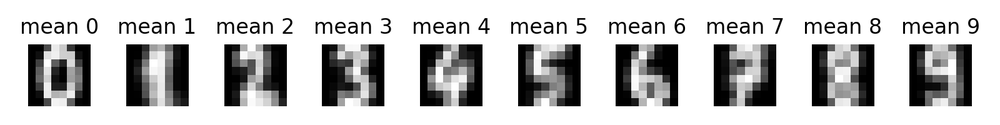</center>

**Hint.**
Use Matplotlib's `subplot` function.

Finally, we will implement our own classifier: for a new digitized digit image, we will predict the class whose average digit is closest.
To do this, we divide our dataset into two parts of similar size:
the first part will serve as training data (`X_train` and `y_train`) and the second part will serve as test data (`X_test` and `y_test`).

**g)**
Define variables: `X_train`, `y_train`, `X_test` and `y_test`.

**h)**
For each digit in the training set, calculate the centroids (*i.e.*, the average digits) of the classes from 0 to 9.
Note the variable containing the set of averages `centroids_train`.

**i)**
Write a function which, given a number in the test set (`X_test`), returns the centroid of the nearest `centroids_train` in the Euclidean norm.

**j)**
Finally, evaluate whether the digit thus obtained corresponds to the true digit using `y_test` and deduce an estimate of the percentage of correct predictions on the test set.

# Exercise 12.5: <font color="red">!</font> Automatic differentiation

The aim of this exercise is to introduce one of the fundamental building blocks of machine learning: automatic differentiation.
This is a technique for calculating derivatives or gradients of Python functions in a way that is virtually transparent to the user.
Given a certain Python function `f(x)`, the aim of automatic differentiation is to make it virtually as easy for the user to evaluate the derivative of `f` at a point `x=1` as it is to do `f(1)`, even if the function $f$ is complicated.
This is the fundamental building block enabling machine learning to learn parameters by optimizing complicated nonlinear functions.

The idea behind automatic differentiation is to use the derivation rule for compound functions and knowledge of the derivatives of basic functions. In fact, a Python function is "just" a composition of basic functions (or instructions).

For sake of simplicity, we are only interested here in the composition of functions on $\mathbb{R}$. For any $i\in\{0,1,\dots,n\}$, let $f_i:\mathbb{R}$ be an elementary function whose derivative is known. Consider the composition of the first $i\leq n$ functions:

$$
F_i = f_i \circ f_{i-1} \circ \cdots \circ f_1 \circ f_0 \,.
$$

The derivative is given by the composition rule (or chain rule):

$$
F_i^\prime = (f_i \circ F_{i-1})^\prime = (f_i^\prime \circ F_{i-1}) \cdot F_{i-1}^\prime \,.
$$

This gives a recursive way of calculating $F_n^\prime$ with the anchor $F_0^\prime = f_0^\prime$.
To calculate the value of $F_n(x)$ for a given $x$, Pyhon will intrinsically calculate successively $F_0(x)$, then $F_1(x)$, $F_2(x)$, up to $F_n(x)$.
Automatic differentiation consists of evaluating $F_0^\prime(x)$, $F_1^\prime(x)$ up to $F_n^\prime(x)$ at the same time or later.

Note that automatic differentiation is neither a numerical approximation nor symbolic calculation. In fact, the value of the derivative is determined exactly (to machine precision), which is not the case with numerical approximation:

$$
f^\prime(x) \approx \frac{f(x+h)-f(x)}{h} \,,
$$

with some $h>0$ small.
It is not symbolic calculation either, as there are no symbols in automatic differentiation, only real numbers. Automatic differentiation calculates the value of the derivative at a given point, whereas symbolic differentiation does this for any symbol.

**a)**
The first step is to define the derivatives of the elementary functions. To do this, build the tuples $\tilde{f} = (f,f^\prime)$ manually for the elementary functions $\sin$, $\cos$, $\operatorname{op}:x\mapsto -x$, $\operatorname{inv}:x\mapsto x^{-1}$ et $\operatorname{square}:x\mapsto x^2$.

**b)**
A composition of functions $F_n = f_n \circ f_{n-1} \circ \cdots \circ f_1 \circ f_0$, will be stored in Python as the list of tuples $[\tilde{f}_0, \tilde{f}_1, \dots, \tilde{f}_n]$.
In Python, define the composition corresponding to the function:

$$
F(x) = \cos\left(\frac{1}{\sin(-\cos x^{2})^{2}}\right).
$$

**c)**
Write a function `eval(list, x)` which, given a list of tuples defining a composition of functions $F_n$, returns $F_n(x)$. Test on the previous example.

**d)**
Write a function `autodiff(list, x)` which, given a tuple list defining a composition of functions $F_n$, returns $F_n(x)$ and $F_n^\prime(x)$. Test again on the same example.

The previous approach only allows the composition of functions of one variable, which is very limiting, as sum and multiplication are functions of two variables. The idea is to be able to consider more complicated functions as well, for example:

$$
G(x) = \frac{\cos(x)}{\sin(x) + \cos(x)\sin(x^2) } \,.
$$

**e)**
As before, implement the sum function $\operatorname{add}:x,y \mapsto x+y$ and the multiplication function $\operatorname{mult}:x,y \mapsto xy$ in tuple form.

**f)**
The previous function $G$ can no longer be represented in Python as a list of compositions, as it has the structure of a graph:

<center>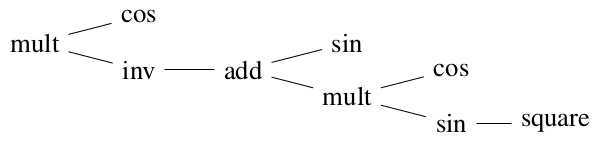</center>

We choose to store it in Python as a list of lists, with the first element of each list being the function to be applied, and the arguments being the following children. For the example $G$ above:

In [76]:
myG = [mult, [cos], [inv, [add, [sin], [mult, [cos], [sin, [square]]]]]]

Write the previous simple composition $F$ in this new form, as well as the function:

$$
H(x) = \frac{\cos(x^{2})+\sin x}{\cos x+2\sin(x^{-1})} \,.
$$

**g)**
Write a function `eval(list,x)` which evaluate an expression in the form of a list of lists described above at `x`. Test on functions $F$, $G$, and $H$.

**h)**
<font color="red">!!</font> Write a function `autodiff(list,x)` which, in addition to returning the evaluation of the function at `x`, also returns the evaluation of its derivative at `x`.

**i)**
<font color="red">!!</font> The previous implementation is not very usable concretely. In practice, automatic differentiation is coded by overloading basic operations in order to be relatively transparent to the user.
Using the package [JAX](https://jax.readthedocs.io/) or [PyTorch](https://pytorch.org/), determine the derivative of the following function by automatic differentiation at `x=0.4`:

In [88]:
def f(x):
    for i in range(50):
        if x>0.5:
            x = 3.7*x*(1-x)
        else:
            x = 3*x*(1-x)
    return x

Finally, compare with numerical differentiation.

**Hint.**
The documentation on automatic differentiation with JAX is [here](https://jax.readthedocs.io/en/latest/automatic-differentiation.html) and with PyTorch [here](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html).

# Exercise 12.6: <font color="red">!</font> Neural network

The aim of this exercise is to introduce the concept of neural network for finding a real function for which only its noisy evaluation is known.
More precisely, consider the function $f:[0,1]\to\mathbb{R}$ defined by:

$$
f(x) = 1 + \sin(4\cos x)^2 \,,
$$

and consider the data generated by 500 noisy evaluations of $f$:

In [94]:
rng = np.random.default_rng(123456)
f = lambda x: 0.1 + np.sin(4*np.cos(x))**2
x = rng.random(500)
y = f(x) + rng.normal(0,0.1,500)

The aim is to forget that the data were generated in this way and to find a function approximating $f$ from `x` and `y` alone.
To achieve this, a single-layer neural network will be used, and we speak of learning the function from the data.
The principle is to construct the learned function in the form:

$$
f_{\boldsymbol{\omega}}(x) = \frac{1}{n}\sum_{i=0}^{n-1} w_i \sigma(a_i x+b_i) \,,
$$

where $\boldsymbol{\omega} = (\boldsymbol{a},\boldsymbol{b},\boldsymbol{w}) \in \mathbb{R}^n \times \mathbb{R}^n \times \mathbb{R}^n$ are parameters to be determined and $\sigma$ the sigmoid function:

$$
\sigma(x) = \frac{1}{1+e^{-x}} \,.
$$

This is a single-layer neural network with $n$ neurons. The principle is to sum $n$ nonlinear functions (the sigmoids) with input weights $\boldsymbol{a}=(a_i)_{i=0}^{n-1}$, biases $\boldsymbol{b}=(b_i)_{i=0}^{n-1}$, and output weights $\boldsymbol{w}=(w_i)_{i=0}^{n-1}$.
Parameters are chosen to minimize the following cost function:

$$
J(\boldsymbol{\omega}) = \sum_{k=0}^{499} \bigl(f_{\boldsymbol{\omega}}(x_k) - y_k\bigr)^2 \,.
$$

The strategy for minimizing $J$ on the parameters $\boldsymbol{\omega}$ is to perform a gradient descent starting with random values $\boldsymbol{\omega}_0$ of the parameters and then successively defining:

$$
\boldsymbol{\omega}_{i+1} = \boldsymbol{\omega}_{i} - \eta J^\prime(\boldsymbol{\omega}_i) \,,
$$

where $J^\prime(\boldsymbol{\omega})$ is the gradient of $J(\boldsymbol{\omega})$ with respect to the parameters and $\eta\in(0,1]$ is a parameter called the learning rate.
The idea of the gradient descent algorithm is to move the parameters in the direction of greatest gradient in order to minimize $J(\boldsymbol{\omega})$. This is known as parameters learning.

**a)**
Plot the data `x` and `y` and the function $f$.

**b)**
Determine the value of the cost function $J$ for the function $f$:

$$
J_f = \sum_{k=0}^{499} \bigl(f(x_k) - y_k\bigr)^2 \,.
$$

**c)**
Define the sigmoid function $\sigma$ in Python and its derivative $\sigma^\prime$, and represent the sigmoid graphically.

**d)**
Implement in Python a function `F(x,omega)` corresponding to the function $f_{\boldsymbol{\omega}}(x)$. Make the function `F(x,omega)` vectorized, *i.e.*, if $x=(x_0,x_1,\dots, x_{k-1})\in\mathbb{R}^k$, then the function should return $(f_{\boldsymbol{\omega}}(x_0), f_{\boldsymbol{\omega}}(x_1), \dots, f_{\boldsymbol{\omega}}(x_{k-1}))$.

**e)**
Calculate by hand the gradient of $f_{\boldsymbol{\omega}}(x)$ with respect to $\boldsymbol{\omega}$ (and not with respect to $x$) and implement this gradient in Python, taking care that it is also vectorized.

**f)**
Implement in Python $J(\boldsymbol{\omega})$ and its gradient $J^\prime(\boldsymbol{\omega})$.

**g)**
With learning rate $\eta=0.01$ and four neurons, learn the parameters $\boldsymbol{\omega}\in\mathbb{R}^{12}$ that tend to minimize $J$.
Compare the value of the cost function $J(\boldsymbol{\omega})$ of the learned function $f_{\boldsymbol{\omega}}$ with the value of the cost function $J_f$ of the function $f$.
Plot the function $f_{\boldsymbol{\omega}}$ as a function of $x$ for these parameters and compare with the function $f$.